# Step Counting Algorithm

### Steps
1. Start at the starting node. Set up trackers for how many steps we’ve taken and what path we’ve taken so far. Note the target steps input which is our desired number of steps.
2. At every node:

    a. For every adjacent node that is not the last node visited, calculate a score where score =  heuristic at adjacent node + steps to adjacent node + steps already taken.

    b. Travel to the next node whose score is closest to the target steps value.

    c. Increment steps taken with the number of steps from current node to the next node and update the current node, path taken, etc.
    
    d. Repeat until the current node is the target node.

In [30]:
import random
from collections import defaultdict
import math
from math import inf, sqrt
from visualization import visualize_graph

class graph_vertex:
  def __init__(self, name, x, y):
    self.name = name
    self.position = (x, y)

In [31]:
# Create a random graph!
def generate_random_graph_nodes(n):
    """
    Generate n random graph nodes with random coordinates.

    Parameters:
    - n (int): The number of nodes to generate.

    Returns:
    - list: A list of GraphVertex objects representing the generated nodes.
    """
    nodes = []
    for i in range(n):
        name = chr(65 + i)  # Generate node names A, B, C, ...
        x = random.randint(0, 30)  # Generates a random whole number between 0 and 30 (inclusive)
        y = random.randint(0, 30)  # Generates a random whole number between 0 and 30 (inclusive)
        nodes.append(graph_vertex(name, x, y))
    return nodes


def calculate_distance(v1, v2):
    """
    Calculate the Euclidean distance between two graph vertices.

    Parameters:
    - v1, v2 (GraphVertex): The two graph vertices.

    Returns:
    - float: The Euclidean distance between v1 and v2.
    """
    x1, y1 = v1.position
    x2, y2 = v2.position
    distance = math.ceil(((x1 - x2)**2 + (y1 - y2)**2)**0.5)
    return distance


def generate_random_connected_graph(nodes):
    """
    Generate a random connected graph with a random number of edges for each node.

    Parameters:
    - nodes (list): A list of GraphVertex objects representing nodes.

    Returns:
    - dict: A dictionary representation of the graph with distances.
    """
    graph = defaultdict(list)

    for i, node in enumerate(nodes):
        # Randomly determine the number of edges for each node
        num_edges = random.randint(1, len(nodes) // 2)

        # Randomly connect the node to other nodes
        for _ in range(num_edges):
            j = random.randint(0, len(nodes) - 1)
            other_node = nodes[j]

            # Avoid connecting a node to itself
            if other_node != node:
                distance = calculate_distance(node, other_node)
                graph[node].append((other_node, distance))
                graph[other_node].append((node, distance))

    return dict(graph)

# Example: Generate 7 random nodes from 'A' to 'G'
random_nodes = generate_random_graph_nodes(10)

print("Random Graph - Nodes")
for vertex in random_nodes:
    print(f"{vertex.name} and {vertex.position}")

# Generate a random connected graph with distances
random_graph = generate_random_connected_graph(random_nodes)

print()

# Print the generated graph
print("Random Graph - Connections")
for vertex, neighbors in random_graph.items():
    print(f"{vertex.name}: {[(neighbor.name, distance) for neighbor, distance in neighbors]}")

Random Graph - Nodes
A and (19, 4)
B and (25, 22)
C and (6, 11)
D and (5, 20)
E and (19, 10)
F and (1, 18)
G and (20, 25)
H and (17, 18)
I and (12, 27)
J and (29, 22)

Random Graph - Connections
A: [('D', 22), ('I', 25), ('F', 23), ('G', 22)]
D: [('A', 22), ('B', 21), ('B', 21), ('H', 13), ('B', 21), ('E', 18), ('F', 5), ('I', 10), ('J', 25)]
I: [('A', 25), ('F', 15), ('F', 15), ('B', 14), ('D', 10)]
F: [('A', 23), ('I', 15), ('I', 15), ('D', 5), ('J', 29)]
B: [('J', 4), ('D', 21), ('E', 14), ('D', 21), ('D', 21), ('I', 14)]
J: [('B', 4), ('C', 26), ('C', 26), ('G', 10), ('F', 29), ('E', 16), ('D', 25), ('E', 16)]
E: [('B', 14), ('D', 18), ('H', 9), ('J', 16), ('J', 16)]
C: [('J', 26), ('J', 26), ('G', 20)]
H: [('D', 13), ('G', 8), ('G', 8), ('E', 9)]
G: [('J', 10), ('H', 8), ('A', 22), ('C', 20), ('H', 8)]


In [32]:
def heuristic(start, target):
  """
    Heuristic function for A* algorithm, calculates the Euclidean distance between two vertices.

    Parameters:
        start (graph_vertex): The starting vertex.
        target (graph_vertex): The target vertex.

    Returns:
        float: The Euclidean distance between the start and target vertices.
  """
  x_distance = abs(start.position[0] - target.position[0])
  y_distance = abs(start.position[1] - target.position[1])
  return sqrt(x_distance * x_distance + y_distance * y_distance)

def stepCounting(graph, start, target_node, target_steps):
  """
  Finds a path from a start node to a target node in a graph, aiming to match a specified number of steps.

  The algorithm iteratively selects the next node to visit based on a scoring that estimates how close 
  the resulting path will be to the desired number of steps. The scoring considers both the steps already 
  taken and an estimate of steps to the target node (heuristic).

  Parameters:
  graph (dict): A dictionary representing the graph. Keys are node identifiers, and values are lists of tuples, 
                where each tuple represents an adjacent node and the number of steps to it.
  start (hashable): The starting node identifier.
  target_node (hashable): The target node identifier.
  target_steps (int): The desired number of steps to reach the target node.

  Returns:
  tuple: A tuple containing two elements:
      - A list representing the path taken from the start node to the target node.
      - An integer representing the total number of steps taken on this path.

  Note:
- Assumes all nodes in the graph have a degree of at least 2 (i.e., every node has at least two adjacent nodes), 
  except for the possibility of the start and target nodes.
- The function does not guarantee finding the exact number of steps specified in `target_steps` but aims 
  to approach it as closely as possible. In cases where the exact number of steps cannot be achieved, the 
  function returns the path with the closest possible number of steps.
- The graph representation and the heuristic function's effectiveness significantly influence the algorithm's 
  performance and accuracy.
- This function allows cycles but does not check for infinite loops; proper graph structure and heuristics are 
  needed to avoid infinite loops.

  """

  steps_taken = 0
  path_taken = [start]
  current_node = start
  previous_node = start

  while current_node != target_node:
    next_nodes = graph[current_node]
    best_node = None
    best_node_score = inf

    for node in next_nodes:
      if node[0] != previous_node: #assume this is for a graph where there are no nodes with only one node adjacent - degree >= 2 for all
        node_heuristic = heuristic(node[0], target_node)
        score = steps_taken + node[1] + node_heuristic
        if abs(score - target_steps) < abs(best_node_score - target_steps):
            best_node = node
            best_node_score = score
    
    steps_taken += best_node[1]
    previous_node = current_node
    current_node = best_node[0]
    path_taken.append(current_node)

  return path_taken, steps_taken

target_steps = 100
path, steps = stepCounting(random_graph, random_nodes[0], random_nodes[-1], target_steps)

print("Path Found!")
for step in path:
  print(f"Node {step.name}")
print(f"Path found with {steps} steps. Target was {target_steps}.")

Path Found!
Node A
Node F
Node I
Node A
Node G
Node J
Path found with 95 steps. Target was 100.


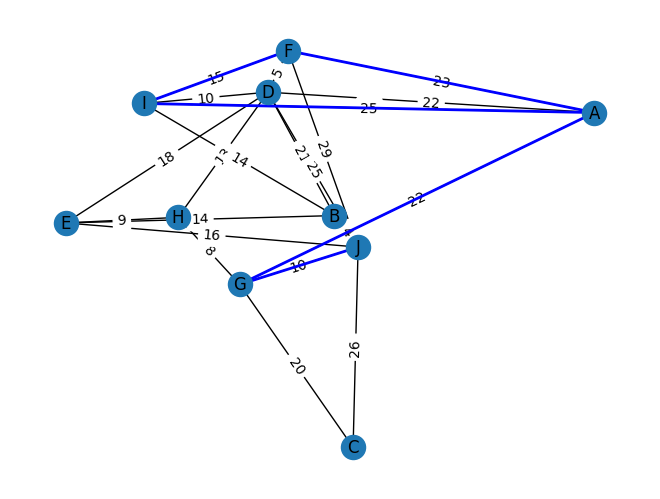

In [33]:
def create_edge_dict(graph):
  """
    Converts a graph into a dictionary for edge visualization.

    Parameters:
        graph (dict): A dictionary representing the graph.

    Returns:
        dict: A dictionary where keys are tuples (start_vertex_name, end_vertex_name) and values are edge weights.
  """
  edge_dict = {}
  for key, connections in graph.items():
    for conn in connections:
        edge_dict[(key.name, conn[0].name)] = conn[1]
            
  return edge_dict

# Visualization of the graph
path = [node.name for node in path]
graph_edge_dict = create_edge_dict(random_graph)
visualize_graph(graph_edge_dict, path)